In [ ]:
import pandas as pd
import numpy as np
import scipy as sp
from scipy.stats import norm
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("Marketing Testing.csv")

In [ ]:
df.head()

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14


In [ ]:
control_df = df[df['test group'] == 'psa']
test_df = df[df['test group'] == 'ad']

In [ ]:
from statsmodels.stats.proportion import proportions_ztest

alpha = 0.05

# Calculate conversions and sample sizes for control and test groups
control_conversions = control_df['converted'].sum()
control_samples = len(control_df)

test_conversions = test_df['converted'].sum()
test_samples = len(test_df)

# Prepare data for proportions_ztest
conversions = [control_conversions, test_conversions]
samples = [control_samples, test_samples]

z_stat, p_value_conv = proportions_ztest(
    count=conversions,
    nobs=samples,
    alternative='two-sided'
)

print(f"Z-statistic: {z_stat:.4f}")
print(f"P-value: {p_value_conv:.4f}")

Z-statistic: -7.3701
P-value: 0.0000


In [ ]:
if p_value <= alpha:
    print("Reject H₀: Statistically significant difference")
else:
    print("Fail to reject H₀: No statistically significant difference")

Fail to reject H₀: No statistically significant difference


In [ ]:
conversion_metrics = (
    df.groupby('test group')
      .agg(
          users=('converted', 'count'),
          conversions=('converted', 'sum'),
          conversion_rate=('converted', 'mean')
      )
      .reset_index()
)

print(conversion_metrics)

  test group   users  conversions  conversion_rate
0         ad  564577        14423         0.025547
1        psa   23524          420         0.017854


In [ ]:
print(df.columns)

Index(['Unnamed: 0', 'user id', 'test group', 'converted', 'total ads',
       'most ads day', 'most ads hour'],
      dtype='object')


In [ ]:
group_metrics = (
    df.groupby('test group')
      .agg(
          users=('converted', 'count'),
          conversions=('converted', 'sum'),
          conversion_rate=('converted', 'mean'),
          avg_ads_seen=('total ads', 'mean'),
          median_ads_seen=('total ads', 'median')
      )
      .reset_index()
)

print(group_metrics)

  test group   users  conversions  conversion_rate  avg_ads_seen  \
0         ad  564577        14423         0.025547     24.823365   
1        psa   23524          420         0.017854     24.761138   

   median_ads_seen  
0             13.0  
1             12.0  


In [ ]:
from scipy.stats import ttest_ind

control_ads = df[df['test group'] == 'psa']['total ads']
test_ads = df[df['test group'] == 'ad']['total ads']

t_stat, p_value = ttest_ind(
    control_ads,
    test_ads,
    equal_var=False  # Welch’s t-test
)

print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

T-statistic: -0.2180
P-value: 0.8274


In [ ]:
from scipy.stats import ttest_ind

control_ads = df[df['test group'] == 'psa']['total ads']
test_ads = df[df['test group'] == 'ad']['total ads']

t_stat, p_value_ads = ttest_ind(
    control_ads,
    test_ads,
    equal_var=False  # Welch’s t-test
)

print("\nTotal Ads Test (t-test)")
print(f"P-value: {p_value_ads:.5f}")


Total Ads Test (t-test)
P-value: 0.82743


In [ ]:
alpha = 0.05

def interpret_result(p_value, metric_name):
    if p_value <= alpha:
        print(
            f"{metric_name}: Statistically SIGNIFICANT "
            f"(reject H₀, p = {p_value:.5f})"
        )
    else:
        print(
            f"{metric_name}: NOT statistically significant "
            f"(fail to reject H₀, p = {p_value:.5f})"
        )


In [ ]:
interpret_result(p_value_conv, "Conversion Rate")
interpret_result(p_value_ads, "Total Ads")

Conversion Rate: Statistically SIGNIFICANT (reject H₀, p = 0.00000)
Total Ads: NOT statistically significant (fail to reject H₀, p = 0.82743)


In [ ]:
p_c = control_conversions / control_samples
p_t = test_conversions / test_samples
n_c = control_samples
n_t = test_samples

# Difference (test - control)
diff = p_t - p_c

# Standard error
se = np.sqrt(
    (p_c * (1 - p_c) / n_c) +
    (p_t * (1 - p_t) / n_t)
)

# 95% CI
z = norm.ppf(0.975)
ci_lower = diff - z * se
ci_upper = diff + z * se

print("Conversion Rate Difference (Test - Control)")
print(f"Difference: {diff:.4f}")
print(f"95% CI: ({ci_lower:.4f}, {ci_upper:.4f})")

Conversion Rate Difference (Test - Control)
Difference: 0.0077
95% CI: (0.0060, 0.0094)


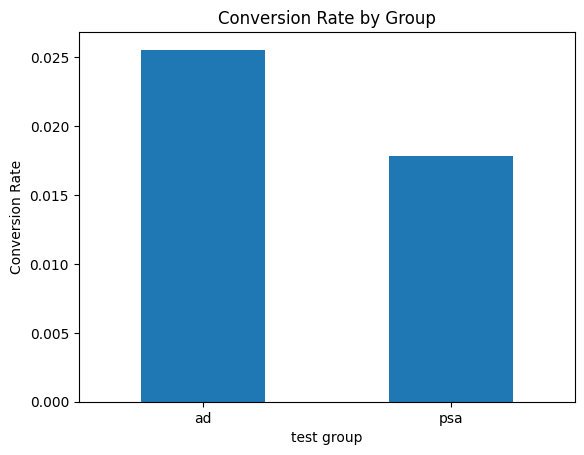

In [ ]:
conv_rates = (
    df.groupby('test group')['converted']
      .mean()
)

conv_rates.plot(kind='bar')
plt.ylabel("Conversion Rate")
plt.title("Conversion Rate by Group")
plt.xticks(rotation=0)
plt.show()